# Basic AI Brain Tumor Detector
(Dataset from https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)

In [751]:
# Import necessary modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from PIL import Image

In [861]:
# Create a dictionary to map the model's predictions (0 or 1) on whether or not a tumor is present
tumor_present = {0:"No Tumor", 1:"Tumor"}

In [753]:
# Download Brain Tumor Data CSV
df = pd.read_csv('/Users/Guddu/Downloads/Brain Tumor Dataset - ML/Brain Tumor.csv')

In [844]:
# Resize data by removing unnecessary columns
df = df.drop(df.columns[2:], axis=1)
df

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0
...,...,...
3757,Image3758,0
3758,Image3759,0
3759,Image3760,0
3760,Image3761,0


In [757]:
# Create a dictionary to map filename to its classification
file_to_label = dict(zip("Downloads/Brain Tumor Dataset - ML/Brain Tumor1/" + df['Image'] + ".jpg", df['Class']))

In [852]:
# Load images and labels to train and test the model
imgs = []
labels = []

for i in range(len(df)):
    # Get file path of current image
    file_path = "Downloads/Brain Tumor Dataset - ML/Brain Tumor1/" + df['Image'].loc[df.index[i]] + ".jpg"
    # Convert current image to an array and append it to imgs
    img_arr = tf.keras.utils.img_to_array(tf.keras.utils.load_img(file_path, color_mode='grayscale', target_size=(240, 240)))
    imgs.append(img_arr)
    # Add the label of the current image
    labels.append(file_to_label[file_path])

# Convert imgs and labels into numpy arrays
imgs = np.array(imgs)
labels = np.array(labels)

In [762]:
# Split images and labels into training and testing data
train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, train_size=0.8, test_size=0.2, random_state=42)

In [850]:
# Check shapes of training and testing data
print(np.shape(train_imgs))
print(np.shape(test_imgs))
print(np.shape(train_labels))
print(np.shape(test_labels))

(3009, 240, 240, 1)
(753, 240, 240, 1)
(3009,)
(753,)


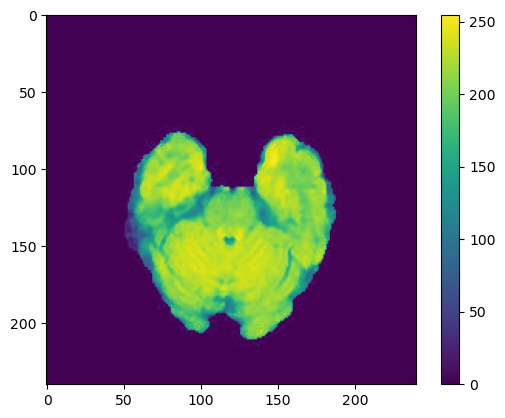

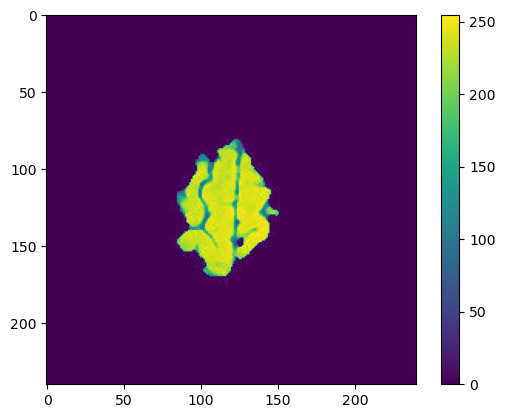

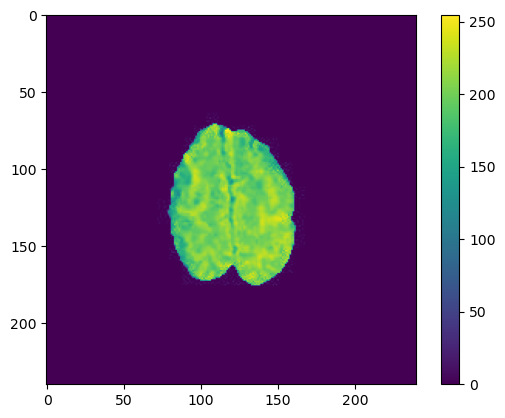

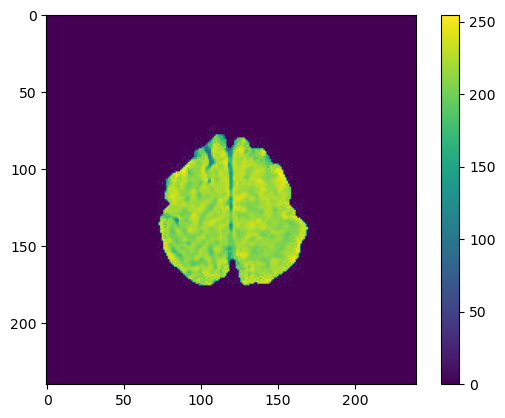

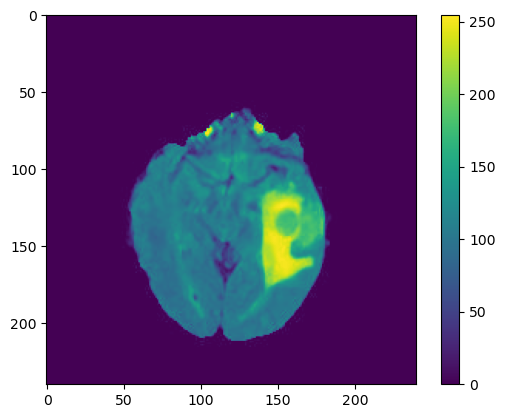

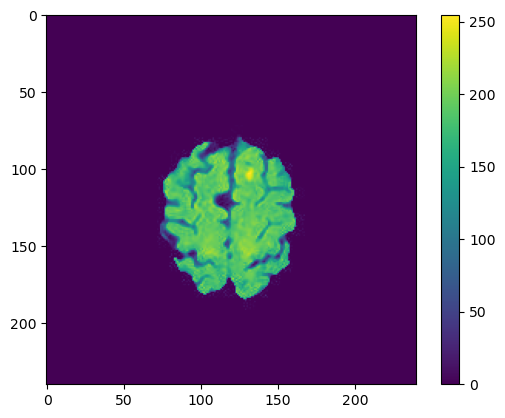

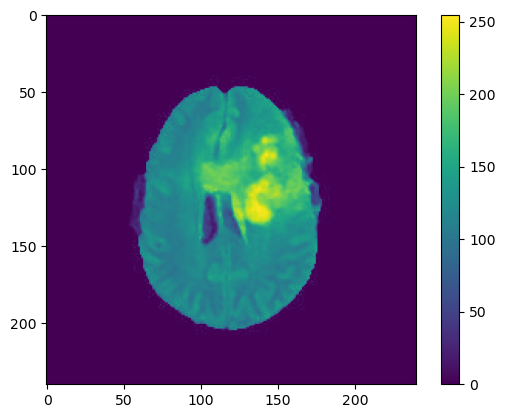

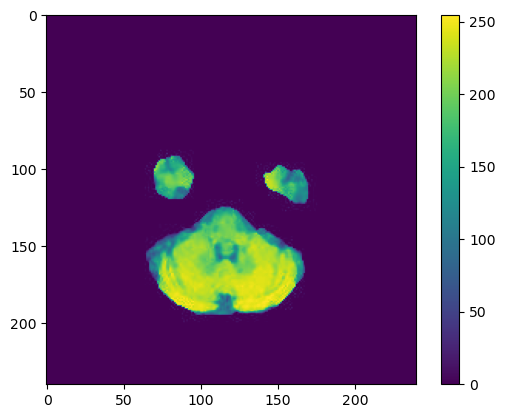

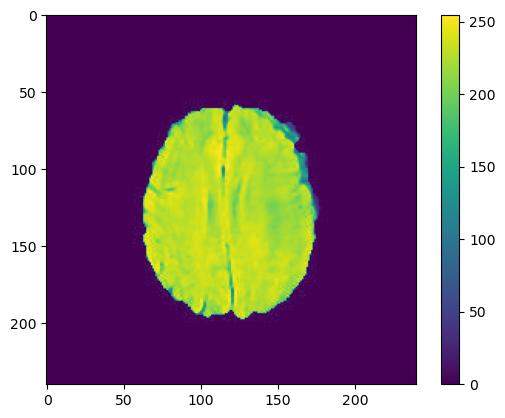

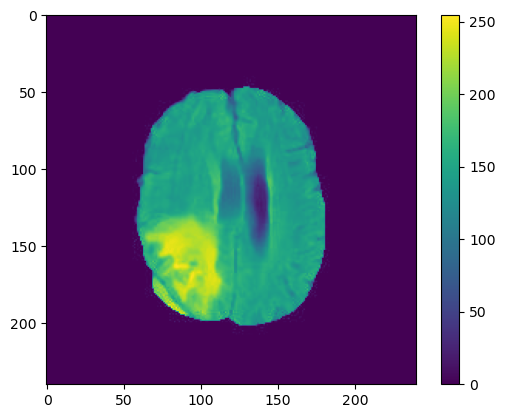

In [771]:
# Check first 10 examples in training image data
for i in range(10):
    plt.figure()
    plt.imshow(train_imgs[i])
    plt.colorbar()
    plt.grid(False)
plt.show()

In [798]:
# Build the model
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(240, 240, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)  # Output layer for binary classification (Brain Tumor or not)
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [800]:
# Compile the model using the adam optimizer and a loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [802]:
# Train the model
model.fit(training_imgs, training_labels, epochs=20)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.7487 - loss: 0.5238
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.8533 - loss: 0.3391
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.8855 - loss: 0.3000
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.9390 - loss: 0.1730
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 246ms/step - accuracy: 0.9498 - loss: 0.1216
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.9760 - loss: 0.0629
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.9808 - loss: 0.0546
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.9802 - loss: 0.0567
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - accuracy: 0.9917 - loss: 0.0285
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 243ms/step - accuracy: 0.9985 - loss: 0.0097
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 12/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23

In [804]:
# Check the model accuracy
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

24/24 - 1s - 62ms/step - accuracy: 0.9920 - loss: 0.0276

Test accuracy: 0.9920318722724915


In [814]:
# Make Predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_imgs)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [848]:
# Get the first prediction
print(f'Prediction: {tumor_present[np.argmax(predictions[2])]}')

# Compare it with the actual classification
print(f'Actual: {tumor_present[test_labels[2]]}')

Prediction: No Tumor
Actual: No Tumor


In [828]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(tumor_present[predicted_label],
                                100*np.max(predictions_array),
                                tumor_present[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

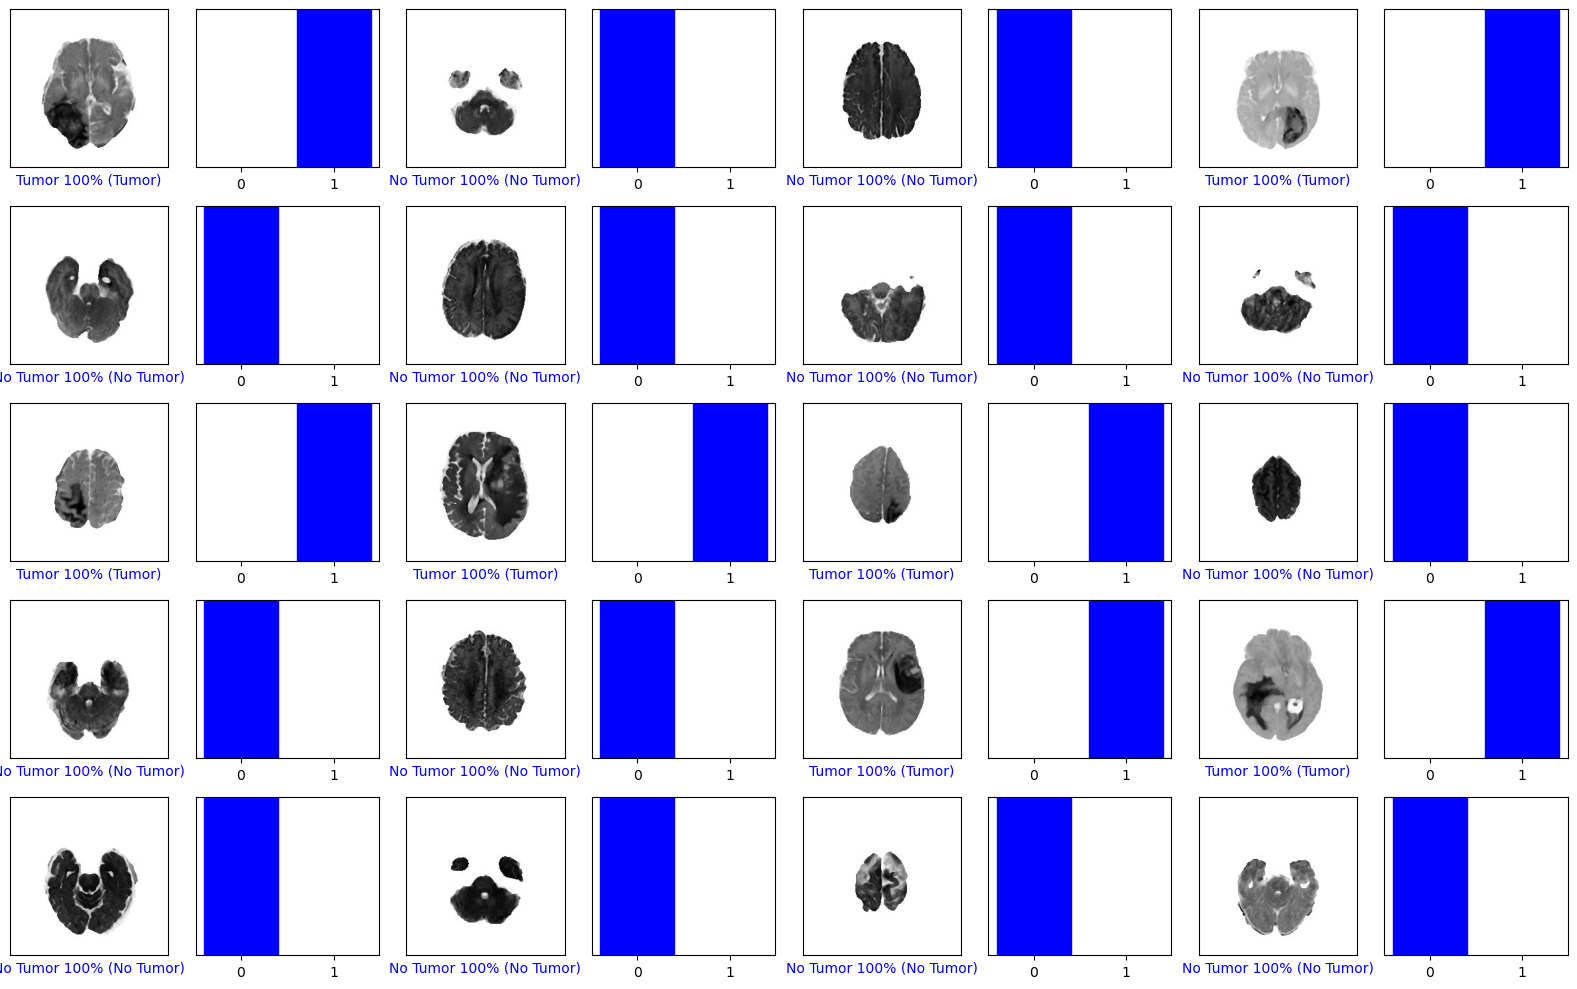

In [854]:
# Plot the first few test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
